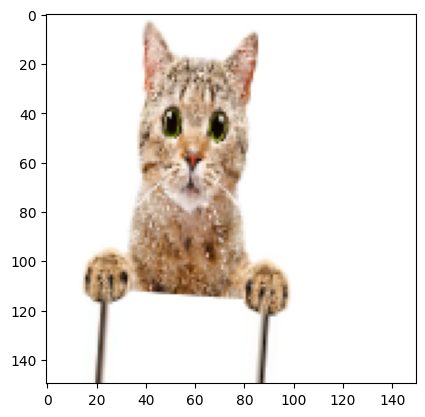

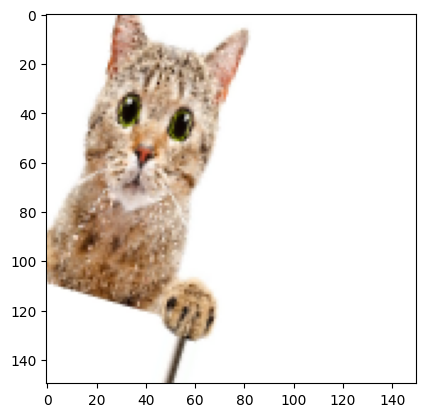

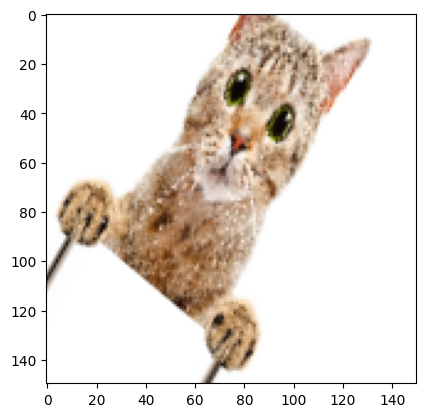

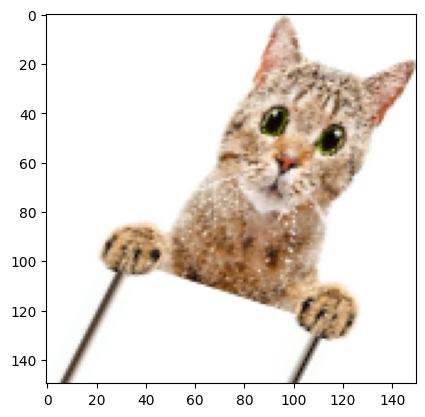

In [3]:
# Import necessary libraries
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the image
img_path = r"H:\DataScience-Lab\Sem-2\FDS\Data\dog cat\test\cats\cat_106.jpg"  # replace with your image path
img = image.load_img(img_path, target_size=(150, 150))  # adjust target_size as needed
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

# Create a data generator for augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Generate augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:  # adjust this to generate more or fewer images
        break

plt.show()


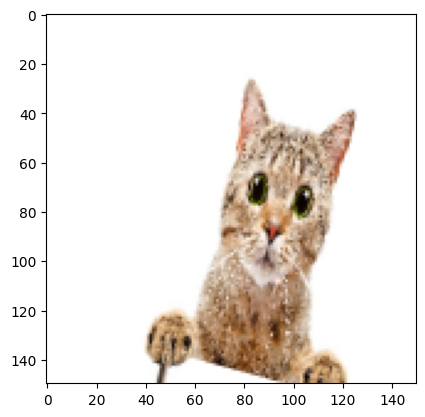

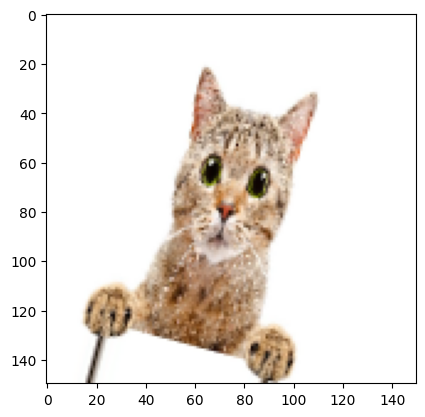

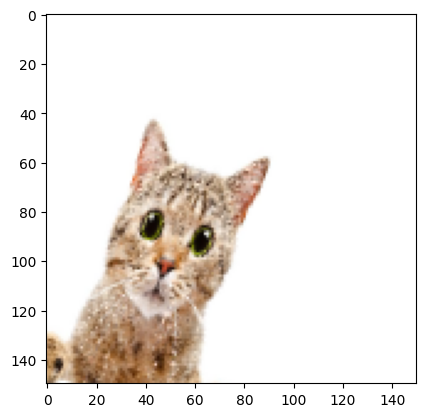

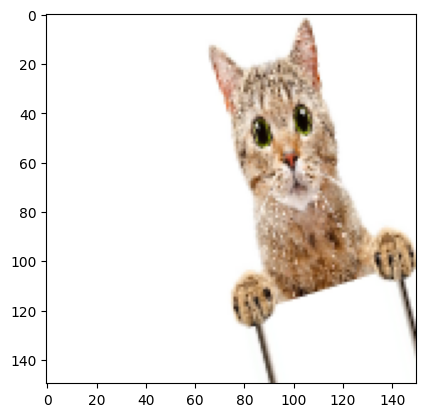

In [6]:
# Import necessary libraries
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the image
img_path = r"H:\DataScience-Lab\Sem-2\FDS\Data\dog cat\test\cats\cat_106.jpg"  # replace with your image path
img = image.load_img(img_path, target_size=(150, 150))  # adjust target_size as needed
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

# Create a data generator for augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Generate augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:  # adjust this to generate more or fewer images
        break

plt.show()


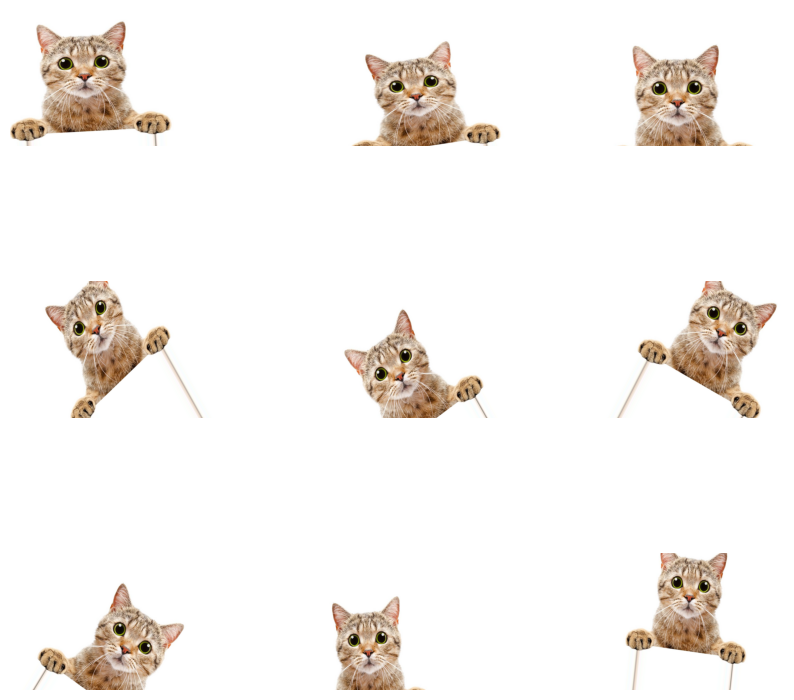

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Directory containing your image files
# img_dir = 'path/to/your/image/directory'
img_dir = r"H:\DataScience-Lab\Sem-2\FDS\Data\dog cat\test\cats"  # replace with your image path

# Load an image from the directory
img_path = os.path.join(img_dir, 'cat_106.jpg')
img = load_img(img_path)

# Convert the image to a numpy array
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Define the augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented images
augmented_images = []
for batch in datagen.flow(img_array, batch_size=1):
    augmented_images.append(batch[0].astype('uint8'))
    if len(augmented_images) >= 9:
        break

# Plot the augmented images
plt.figure(figsize=(10, 10))
for i, augmented_image in enumerate(augmented_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image)
    plt.axis('off')
plt.show()


In [13]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150
BATCH_SIZE = 32
NUM_EPOCHS = 5
NUM_CLASSES = 2

# Directory path for training data (also used for validation)
train_dir = r"H:\DataScience-Lab\Sem-2\FDS\Data\dog cat"


In [15]:
data = tf.keras.utils.image_dataset_from_directory(r"H:\DataScience-Lab\Sem-2\FDS\Data\dog cat"
)
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 697 files belonging to 2 classes.


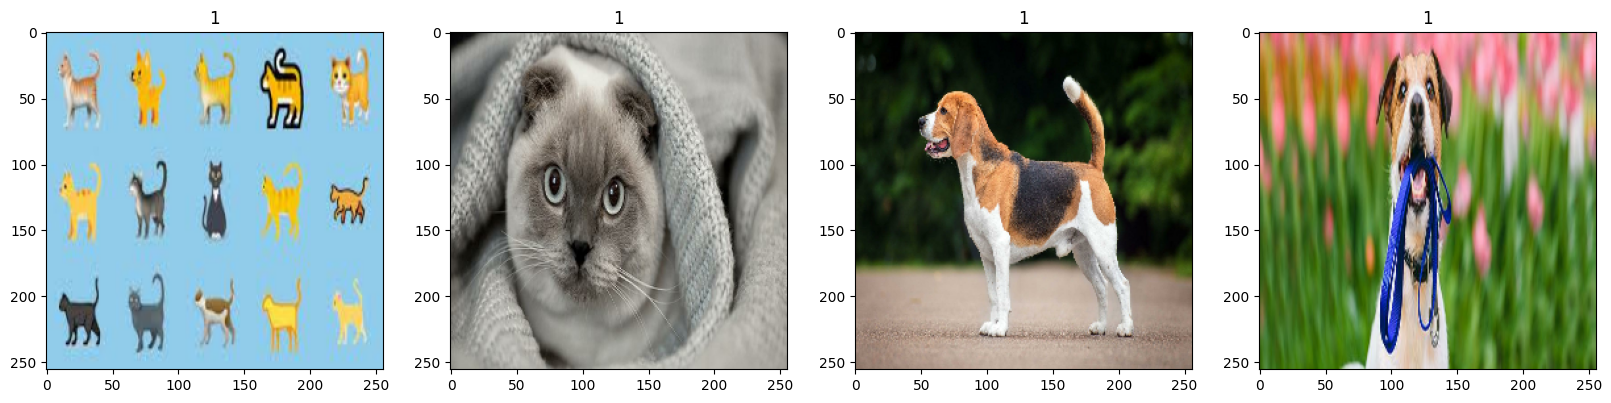

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [17]:
data = data.map(lambda x,y: (x/255, y))

In [18]:
data.as_numpy_iterator().next()

(array([[[[2.18443632e-01, 2.06678927e-01, 1.71384797e-01],
          [2.20373780e-01, 1.92922801e-01, 1.61550239e-01],
          [1.59482226e-01, 1.43795952e-01, 9.71354172e-02],
          ...,
          [2.73330271e-01, 3.92738968e-01, 2.38434434e-01],
          [2.87009805e-01, 2.78967530e-01, 2.30713844e-01],
          [2.85064340e-01, 3.28799009e-01, 1.56081498e-01]],
 
         [[1.98284313e-01, 1.86519608e-01, 1.51225492e-01],
          [2.34099269e-01, 1.98805153e-01, 1.71354160e-01],
          [2.10569859e-01, 1.94883585e-01, 1.51746318e-01],
          ...,
          [1.12561278e-01, 2.12132350e-01, 7.60723054e-02],
          [3.39996934e-01, 3.37867647e-01, 2.35814944e-01],
          [3.40211391e-01, 4.06541049e-01, 1.84114590e-01]],
 
         [[1.70925245e-01, 1.51317403e-01, 1.27787992e-01],
          [2.13725492e-01, 1.76439956e-01, 1.57827824e-01],
          [2.06035540e-01, 1.90349266e-01, 1.55055150e-01],
          ...,
          [3.16528797e-01, 3.92938107e-01, 2.8223

In [30]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [31]:
train_size

15

In [32]:
val_size

4

In [33]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [34]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [36]:
model = Sequential()

In [37]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [38]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 30, 30, 16)       

In [41]:
# batch_size = 32
# generator = datagen.flow_from_directory(
#     train_dir,
#     target_size=(244, 244),
#     batch_size=batch_size,
#     class_mode='categorical'  # Adjust based on your problem (e.g., 'binary' or 'categorical')
# )

In [44]:
hist = model.fit(train, epochs=4, validation_data=val, callbacks=[tensorboard_callback])

# hist = model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/4
15/15 [==============================] - 15s 826ms/step - loss: 0.6489 - accuracy: 0.7688 - val_loss: 0.4961 - val_accuracy: 0.7969
Epoch 2/4
15/15 [==============================] - 17s 1s/step - loss: 0.5301 - accuracy: 0.7958 - val_loss: 0.4919 - val_accuracy: 0.8125
Epoch 3/4
15/15 [==============================] - 15s 947ms/step - loss: 0.5145 - accuracy: 0.7917 - val_loss: 0.5481 - val_accuracy: 0.7656
Epoch 4/4
15/15 [==============================] - 15s 949ms/step - loss: 0.4978 - accuracy: 0.8000 - val_loss: 0.4767 - val_accuracy: 0.8047


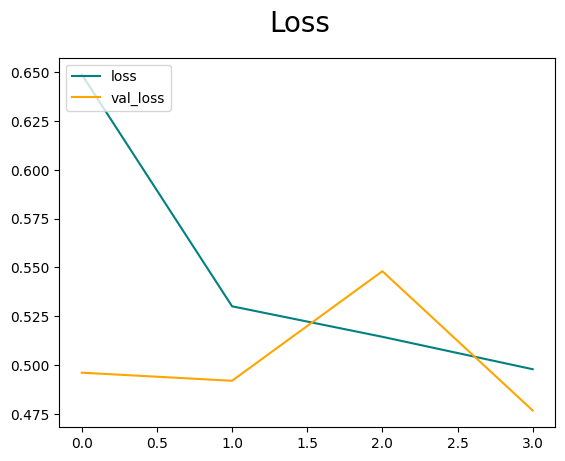

In [45]:
# Loss and val_loss accuracy
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

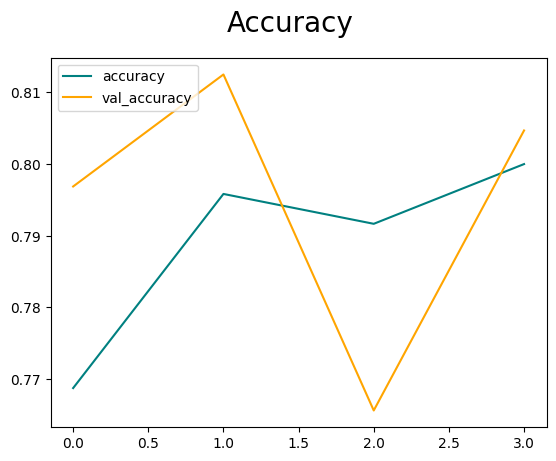

In [46]:
# accuracy and val_accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [50]:
import cv2

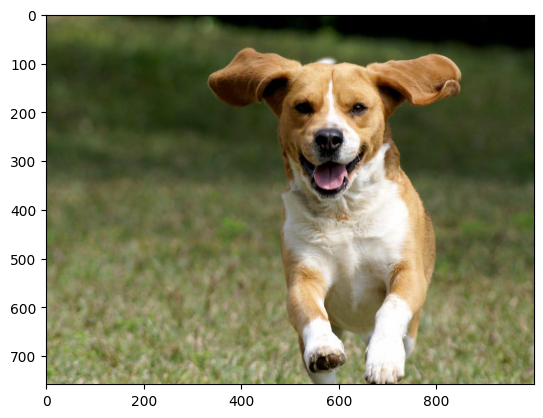

In [51]:
img = cv2.imread(r"H:\DataScience-Lab\Sem-2\FDS\Data\dog cat\test\dogs\dog_155.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

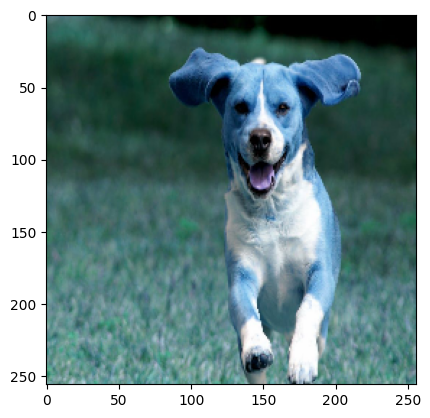

In [53]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [59]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 27ms/step


array([[0.88118184]], dtype=float32)

In [61]:
if yhat < 0.5: 
    print(f'Predicted class is Not dog')
else:
    print(f'Predicted class is dog')

Predicted class is dog


In [29]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150
BATCH_SIZE = 32
NUM_EPOCHS = 5
NUM_CLASSES = 2

# Directory paths
train_dir = r"H:\DataScience-Lab\Sem-2\FDS\Data\dog cat\train"
test_dir = r"H:\DataScience-Lab\Sem-2\FDS\Data\dog cat\test"

# Create a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Data augmentation for testing images (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Epoch 1/5
17/17 [==============================] - 15s 820ms/step - loss: 0.8785 - accuracy: 0.5181 - val_loss: 0.6869 - val_accuracy: 0.5547
Epoch 2/5
17/17 [==============================] - 17s 986ms/step - loss: 0.6940 - accuracy: 0.5276 - val_loss: 0.6896 - val_accuracy: 0.5469
Epoch 3/5
17/17 [==============================] - 16s 961ms/step - loss: 0.7029 - accuracy: 0.5638 - val_loss: 0.6880 - val_accuracy: 0.5469
Epoch 4/5
17/17 [==============================] - 15s 888ms/step - loss: 0.6786 - accuracy: 0.5676 - val_loss: 0.6859 - val_accuracy: 0.6094
Epoch 5/5
5/5 [==============================] - 1s 258ms/step - loss: 0.6985 - accuracy: 0.5643
Test Loss: 0.6984685659408569
Test Accuracy: 0.5642856955528259
